In [1]:
import warnings
warnings.filterwarnings("ignore")
# Wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from env import get_db_url

In [2]:
url = get_db_url("zillow")

sql = """
select * from properties_2017
join predictions_2017 using(parcelid)
left join airconditioningtype using(airconditioningtypeid)
left join architecturalstyletype using(architecturalstyletypeid)
left join buildingclasstype using(buildingclasstypeid)
left join heatingorsystemtype using(heatingorsystemtypeid)
left join propertylandusetype using(propertylandusetypeid)
left join storytype using(storytypeid)
left join typeconstructiontype using(typeconstructiontypeid)
where latitude IS NOT NULL
and longitude IS NOT NULL
"""

df = pd.read_sql(sql, url)
df.to_csv("zillow.csv")

In [3]:
df = pd.read_csv("zillow.csv")
df.head()

,Unnamed: 0,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,...,4,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 70 columns):
Unnamed: 0                      77580 non-null int64
typeconstructiontypeid          223 non-null float64
storytypeid                     50 non-null float64
propertylandusetypeid           77580 non-null float64
heatingorsystemtypeid           49572 non-null float64
buildingclasstypeid             15 non-null float64
architecturalstyletypeid        207 non-null float64
airconditioningtypeid           25007 non-null float64
parcelid                        77580 non-null int64
id                              77580 non-null int64
basementsqft                    50 non-null float64
bathroomcnt                     77580 non-null float64
bedroomcnt                      77580 non-null float64
buildingqualitytypeid           49810 non-null float64
calculatedbathnbr               76964 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        

In [5]:
df.shape

(77580, 70)

In [6]:
df.dtypes

Unnamed: 0                  int64
typeconstructiontypeid    float64
storytypeid               float64
propertylandusetypeid     float64
heatingorsystemtypeid     float64
                           ...   
buildingclassdesc          object
heatingorsystemdesc        object
propertylandusedesc        object
storydesc                  object
typeconstructiondesc       object
Length: 70, dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0                    0
typeconstructiontypeid    77357
storytypeid               77530
propertylandusetypeid         0
heatingorsystemtypeid     28008
                          ...  
buildingclassdesc         77565
heatingorsystemdesc       28008
propertylandusedesc           0
storydesc                 77530
typeconstructiondesc      77357
Length: 70, dtype: int64

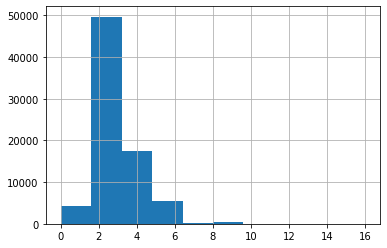

In [8]:
df.bedroomcnt.hist()

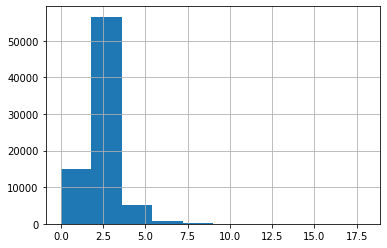

In [9]:
df.bathroomcnt.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122956c50>,
      dtype=object)

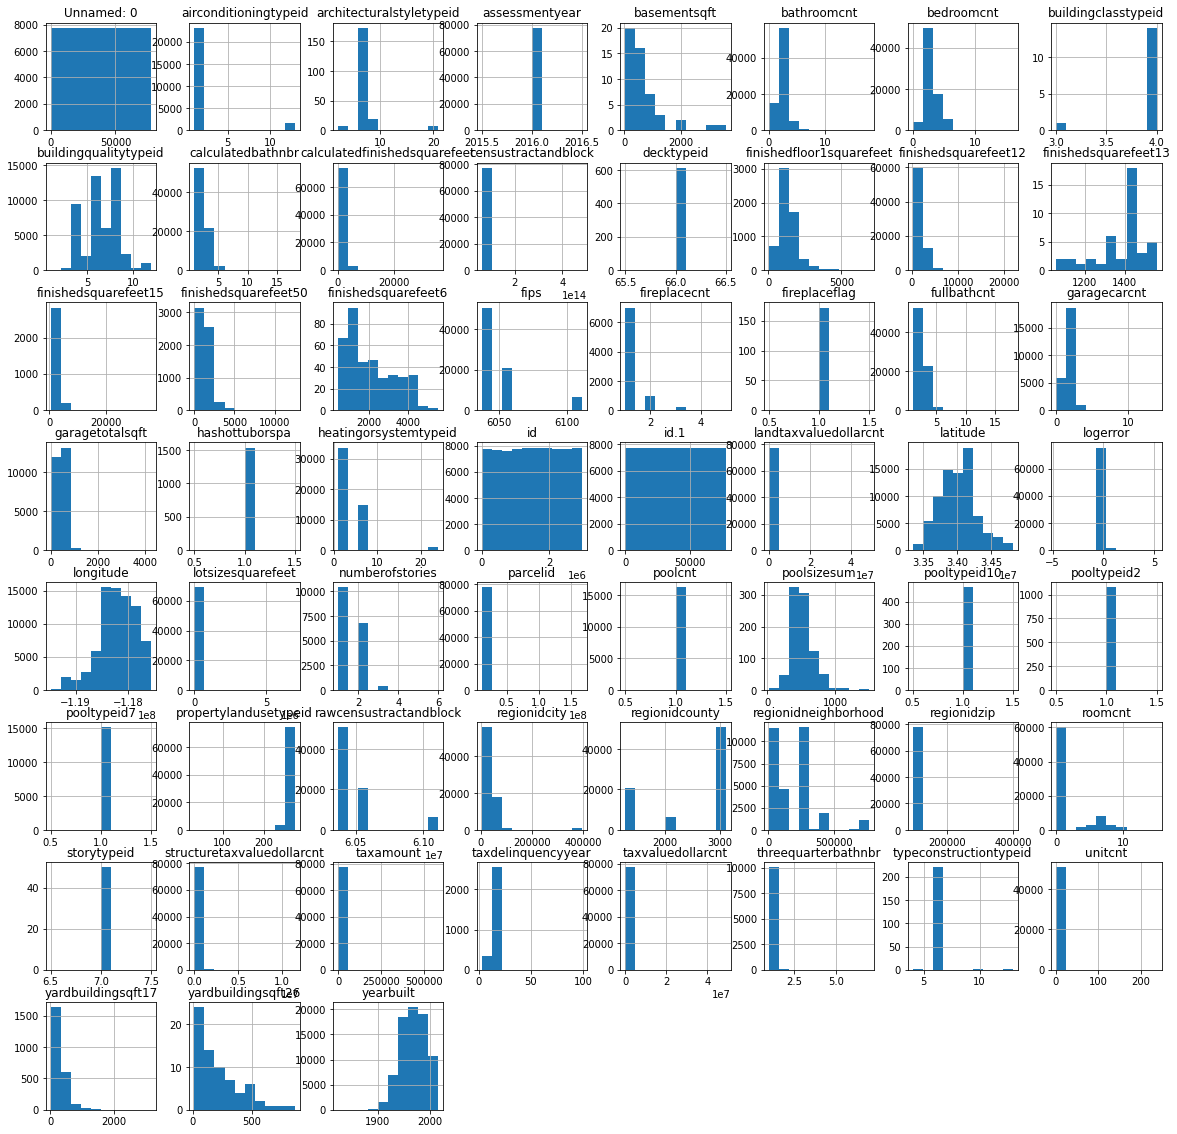

In [10]:
df.hist(figsize=(20, 20))

Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [11]:
# figure out how much data is missing and the percent of missing data
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = num_missing / rows
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'pct_rows_missing': pct_missing})
    return cols_missing

In [12]:
nulls_by_column = nulls_by_col(df)
nulls_by_column

,num_rows_missing,pct_rows_missing
Unnamed: 0,0,0.000000
typeconstructiontypeid,77357,0.997126
storytypeid,77530,0.999356
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,28008,0.361021
...,...,...
buildingclassdesc,77565,0.999807
heatingorsystemdesc,28008,0.361021
propertylandusedesc,0,0.000000
storydesc,77530,0.999356


In [41]:
def nulls_by_row(df):
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = (df.isnull().sum(axis=1)/df.shape[1]*100).round(3)
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing 

null_rows = nulls_by_row(df)
null_rows

,num_cols_missing,pct_cols_missing,num_rows
0,0,0.0,32686
1,1,3.333,18886
2,2,6.667,625
3,3,10.0,23
4,4,13.333,40
5,5,16.667,7
6,6,20.0,1


In [14]:
df.columns.tolist()

['Unnamed: 0',
 'typeconstructiontypeid',
 'storytypeid',
 'propertylandusetypeid',
 'heatingorsystemtypeid',
 'buildingclasstypeid',
 'architecturalstyletypeid',
 'airconditioningtypeid',
 'parcelid',
 'id',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'num

In [15]:
# .isin([collection])
df = df[df.propertylandusetypeid.isin([260, 261, 262, 279])]

In [16]:
# Only retain homes with a positive number of bedrooms and bathrooms
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0)]
df.shape

(52300, 70)

In [17]:
df.unitcnt.value_counts()

1.0    33783
2.0       28
4.0        3
3.0        1
Name: unitcnt, dtype: int64

In [18]:
# 18485 null unit counts. They're probably unit counts of 1.
df.unitcnt.isnull().sum()

18485

In [19]:
df.unitcnt = df.unitcnt.fillna(1.0)
df.shape

(52300, 70)

In [20]:
# Filter the duplex, triplex, etc...
df = df[df.unitcnt == 1.0]

In [21]:
df.unitcnt.value_counts()

1.0    52268
Name: unitcnt, dtype: int64

In [22]:
# Drop logically unnecessary columns
# Unnamed:0
# id
# id.1
df = df.drop(columns=["Unnamed: 0", "id", "id.1"])

In [23]:
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,basementsqft,bathroomcnt,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,NaN,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
6,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12095076,NaN,3.0,...,6.037461e+13,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [24]:
def handle_missing_values(df, prop_required_column = .60, prop_required_row = .60):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [25]:
df = handle_missing_values(df)
df.shape

(52268, 33)

In [26]:
df.isnull().sum()

propertylandusetypeid               0
heatingorsystemtypeid           18369
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18571
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
finishedsquarefeet12              166
fips                                0
fullbathcnt                        16
latitude                            0
longitude                           0
lotsizesquarefeet                 351
propertycountylandusecode           0
propertyzoningdesc              18510
rawcensustractandblock              0
regionidcity                     1029
regionidcounty                      0
regionidzip                        23
roomcnt                             0
unitcnt                             0
yearbuilt                          40
structuretaxvaluedollarcnt         71
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvalue

In [27]:
# Columns to drop b/c they're ids of descriptions
# propertylandusetypeid
# heatingorsystemtypeid
df = df.drop(columns=["propertylandusetypeid", "heatingorsystemtypeid"])

In [28]:
df.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18571
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
finishedsquarefeet12              166
fips                                0
fullbathcnt                        16
latitude                            0
longitude                           0
lotsizesquarefeet                 351
propertycountylandusecode           0
propertyzoningdesc              18510
rawcensustractandblock              0
regionidcity                     1029
regionidcounty                      0
regionidzip                        23
roomcnt                             0
unitcnt                             0
yearbuilt                          40
structuretaxvaluedollarcnt         71
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           4
censustracta

In [29]:
df.heatingorsystemdesc.value_counts(dropna=False)

Central       20723
NaN           18369
Floor/Wall    12542
Forced air      517
Solar            85
None             16
Baseboard         7
Radiant           6
Gravity           2
Yes               1
Name: heatingorsystemdesc, dtype: int64

In [30]:
# b/c these properties are in southern california 
df.heatingorsystemdesc = df.heatingorsystemdesc.fillna("None")

In [31]:
df.isna().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18571
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
finishedsquarefeet12              166
fips                                0
fullbathcnt                        16
latitude                            0
longitude                           0
lotsizesquarefeet                 351
propertycountylandusecode           0
propertyzoningdesc              18510
rawcensustractandblock              0
regionidcity                     1029
regionidcounty                      0
regionidzip                        23
roomcnt                             0
unitcnt                             0
yearbuilt                          40
structuretaxvaluedollarcnt         71
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           4
censustracta

In [32]:
df = df.drop(columns=["propertyzoningdesc"])

In [33]:
df.isna().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18571
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
finishedsquarefeet12              166
fips                                0
fullbathcnt                        16
latitude                            0
longitude                           0
lotsizesquarefeet                 351
propertycountylandusecode           0
rawcensustractandblock              0
regionidcity                     1029
regionidcounty                      0
regionidzip                        23
roomcnt                             0
unitcnt                             0
yearbuilt                          40
structuretaxvaluedollarcnt         71
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           4
censustractandblock               109
logerror    

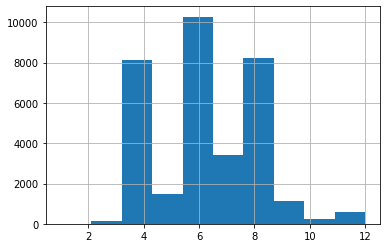

In [34]:
df.buildingqualitytypeid.hist(bins=10)